# EJECUCIÓN PARA REGRESIÓN

## IMPORTAR PAQUETES

In [1]:
import os
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Calidad de Datos
from janitor import clean_names

#Transformación de Variables
from sklearn.preprocessing import OneHotEncoder



from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_absolute_percentage_error


#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

## IMPORTAR LOS DATOS

Cargamos JSON.DATA

In [2]:
# Obtener la ruta del directorio raíz
directorio_raiz = os.getcwd()

# Nombre del archivo JSON
nombre_archivo = "data.json"

# Ruta completa del archivo JSON
ruta_archivo = os.path.join(directorio_raiz, nombre_archivo)

# Abrir el archivo en modo lectura
with open(ruta_archivo, "r") as archivo:
    # Cargar el contenido del archivo JSON
    data = json.load(archivo)

Sustituir la ruta del proyecto.

In [3]:
ruta_proyecto = data['ruta_proyecto']

Nombres de los ficheros de datos.

In [4]:
nombre_x = 'x_preseleccionado.pickle'
nombre_y = 'y_preseleccionado.pickle'

Cargar los datos.

In [5]:
x = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_x)
y = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_y)

## MODELIZAR

### Reservar el dataset de validacion

In [6]:
train_x,val_x,train_y,val_y = train_test_split(x,y,test_size=0.3)

### Crear el pipe y el diccionario de algorimos, parámetros y valores a testar

Modificar para dejar solo los algoritmos que se quieran testar.

Modificar los parámetros.

In [7]:
pipe = Pipeline([('algoritmo',XGBRegressor())])

grid = [{'algoritmo': [LinearRegression()],
         'algoritmo__n_jobs': [-1]},
            
        {'algoritmo': [XGBRegressor()],
         'algoritmo__n_jobs': [-1],
         'algoritmo__learning_rate': [0.01,0.025,0.05,0.1],
         'algoritmo__max_depth': [5,10,20],
         'algoritmo__reg_alpha': [0,0.1,0.5,1],
         'algoritmo__reg_lambda': [0.01,0.1,1],
         'algoritmo__n_estimators': [100,500,1000]},
       ]

### Optimizar los hiper parámetros

Elegir si se quiere usar grid search o random search.

Comentar la opción que no se vaya a usar.

####  Con grid search

In [8]:
'''grid_search = GridSearchCV(estimator= pipe, 
                            param_grid = grid, 
                           cv = 3, 
                           scoring = 'neg_mean_absolute_percentage_error',
                            verbose = 0,
                            n_jobs = -1)

modelo = grid_search.fit(train_x,train_y)

pd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')'''

"grid_search = GridSearchCV(estimator= pipe, \n                            param_grid = grid, \n                           cv = 3, \n                           scoring = 'neg_mean_absolute_percentage_error',\n                            verbose = 0,\n                            n_jobs = -1)\n\nmodelo = grid_search.fit(train_x,train_y)\n\npd.DataFrame(grid_search.cv_results_).sort_values(by = 'rank_test_score')"

####  Con random search

In [9]:
random_search = RandomizedSearchCV(estimator = pipe,
                                   param_distributions = grid, 
                                   n_iter = 25, 
                                   cv = 3, 
                                   scoring = 'neg_mean_absolute_percentage_error', 
                                   verbose = 0,
                                   n_jobs = -1)

modelo = random_search.fit(train_x,train_y)

pd.DataFrame(random_search.cv_results_).sort_values(by = 'rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritmo__reg_lambda,param_algoritmo__reg_alpha,param_algoritmo__n_jobs,param_algoritmo__n_estimators,param_algoritmo__max_depth,param_algoritmo__learning_rate,param_algoritmo,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
6,0.19,0.01,0.01,0.00,1,0.50,-1,100,5,0.05,"XGBRegressor(base_score=None, booster=None, ca...","{'algoritmo__reg_lambda': 1, 'algoritmo__reg_a...",-0.14,-0.14,-0.14,-0.14,0.00,1
18,0.33,0.01,0.01,0.00,1,1,-1,100,10,0.05,"XGBRegressor(base_score=None, booster=None, ca...","{'algoritmo__reg_lambda': 1, 'algoritmo__reg_a...",-0.15,-0.14,-0.14,-0.14,0.00,2
21,1.84,0.08,0.03,0.00,1,1,-1,1000,5,0.03,"XGBRegressor(base_score=None, booster=None, ca...","{'algoritmo__reg_lambda': 1, 'algoritmo__reg_a...",-0.15,-0.14,-0.15,-0.15,0.00,3
2,0.23,0.00,0.01,0.00,0.10,0.50,-1,100,10,0.05,"XGBRegressor(base_score=None, booster=None, ca...","{'algoritmo__reg_lambda': 0.1, 'algoritmo__reg...",-0.15,-0.15,-0.15,-0.15,0.00,4
9,1.93,0.02,0.04,0.00,0.01,0.50,-1,500,10,0.01,"XGBRegressor(base_score=None, booster=None, ca...","{'algoritmo__reg_lambda': 0.01, 'algoritmo__re...",-0.15,-0.15,-0.15,-0.15,0.00,5


## EVALUAR

### Predecir sobre validación del Dataset de Trabajo

In [10]:
pred = modelo.best_estimator_.predict(val_x)

### Evaluar sobre validación

In [11]:
mean_absolute_percentage_error(val_y, pred)


0.1351234995233938

### Examinar el mejor modelo

In [12]:
modelo.best_estimator_

Pipeline(steps=[('algoritmo',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=-1, num_parallel_tree=None, predictor=None,
                              random_state=None, ...))])

## EJECUCIÓN DEL MODELO DE PRODUCCIÓN CON EL DATASET DE VALIDACIÓN

Cargamos JSON.DATA

In [13]:
# Obtener la ruta del directorio raíz
directorio_raiz = os.getcwd()

# Nombre del archivo JSON
nombre_archivo = "data.json"

# Ruta completa del archivo JSON
ruta_archivo = os.path.join(directorio_raiz, nombre_archivo)

# Abrir el archivo en modo lectura
with open(ruta_archivo, "r") as archivo:
    # Cargar el contenido del archivo JSON
    data = json.load(archivo)

Sustituir la ruta del proyecto.

In [14]:
ruta_proyecto = data['ruta_proyecto']

Cargar el dataset de validación

In [15]:
df = pd.read_csv(ruta_proyecto + '/02_Datos/02_Validacion/' + data['nombre_fichero_validacion'])
df.head()

,Unnamed: 0,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2146,M,0.47,0.35,0.12,0.52,0.20,0.16,0.18,11
1,1569,I,0.47,0.36,0.14,0.63,0.28,0.14,0.19,8
2,3280,M,0.69,0.54,0.18,1.62,0.53,0.35,0.56,24
3,3680,F,0.61,0.49,0.17,1.08,0.45,0.27,0.32,9
4,515,M,0.27,0.20,0.08,0.10,0.04,0.02,0.03,6


## Calidad de Datos

In [16]:
#Eliminamos Unnamed:0 (index)
df.drop(columns= 'Unnamed: 0',inplace= True)

#Renombramos las columnas
df = clean_names(df)

#Creamos la target
df['age'] = df.rings + 1.5

#Gestionamos atípicos

num_desv_tip = 4

def atipicos_desv_tip(variable, num_desv_tip = 4):
    #sacamos los nulos por ahora
    variable = variable.dropna()
    #calculamos los límites
    media = np.mean(variable)
    sd = np.std(variable)
    umbral = sd * num_desv_tip
    lim_inf = media - umbral
    lim_sup = media + umbral
    #encontramos los índices de los que están fuera de los límites
    indices = [indice for indice,valor in variable.items() if valor < lim_inf or valor > lim_sup]
    return(indices)

var_atipicos_dt = [ 'height',
                    'whole_weight',
                    'shucked_weight',
                    'viscera_weight',
                    'shell_weight',
                    'rings']

for variable in var_atipicos_dt:
    df.drop(atipicos_desv_tip(df[variable], num_desv_tip),axis = 0, inplace = True)


## Transformación de Datos

In [17]:
var_ohe = ['sex']
ohe = OneHotEncoder(sparse_output= False, handle_unknown='ignore')
cat_ohe = ohe.fit_transform(df[var_ohe])
cat_ohe = ohe.fit_transform(df[var_ohe])
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out())
df = pd.concat([df,cat_ohe], axis=1)

In [18]:
#Eliminamos nulos
df.dropna(inplace=True)

### Preselección de variables

In [19]:
# Preparamos X y Y
x = df.drop(columns = ['age','rings']).copy()
y =  df['age'].copy()

Variables predictivas = ['shell_weight', 'height', 'length', 'sex_I']

In [20]:
print(x.columns.to_list())

['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'sex_F', 'sex_I', 'sex_M']


In [21]:
# Dejamos solo las variables predictivas
a_eliminar_corr = [ 'sex',
                    'diameter',
                    'whole_weight',
                    'viscera_weight',
                    'shucked_weight',
                    'sex_F',
                    'sex_M']

x.drop(columns = a_eliminar_corr, inplace = True)
x.columns.to_list()

['length', 'height', 'shell_weight', 'sex_I']

In [22]:
# Ordenar las columnas en el orden deseado
column_order = ['shell_weight', 'height', 'length', 'sex_I']
x = x.reindex(columns=column_order)

## EVALUAR

### Predecir sobre validación del Dataset de Trabajo

In [23]:
pred = modelo.best_estimator_.predict(x)

### Evaluar sobre validación

In [24]:
mean_absolute_percentage_error(y, pred)


0.1477574556224185

## Gráficios de validación modelos de regresión

1. Gráfico de dispersión de valores reales vs. valores predichos: 

Este gráfico muestra los puntos de datos observados en un diagrama de dispersión, y superpone la línea de regresión que representa la relación lineal ajustada por el modelo. Puedes utilizar este gráfico para evaluar visualmente cómo se ajusta la línea de regresión a los datos observados.

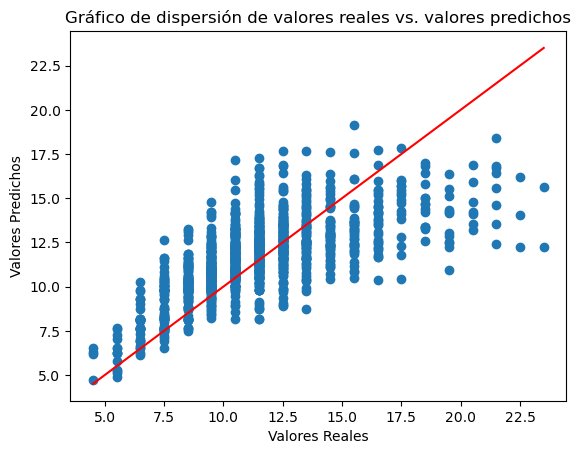

In [26]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# y = target: Valores reales
# pred - predicción: Valores predichos por el modelo

plt.scatter(y, pred)
plt.plot([min(y), max(y)], [min(y), max(y)], color='red')  # Línea diagonal
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Gráfico de dispersión de valores reales vs. valores predichos')
plt.show()


2. Gráfico de residuos vs. valores predichos: 


Un gráfico de residuos muestra los residuos (diferencias entre los valores observados y los valores predichos por el modelo) en función de los valores ajustados o las variables independientes. Este gráfico puede ayudarte a verificar si los residuos tienen algún patrón sistemático, como una relación no lineal o una heterocedasticidad.

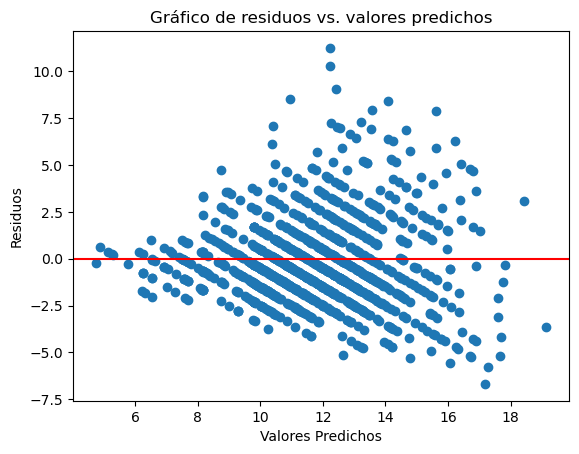

In [28]:
residuos = y - pred

plt.scatter(pred, residuos)
plt.axhline(y=0, color='red')  # Línea horizontal en cero
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gráfico de residuos vs. valores predichos')
plt.show()


3. Histograma de residuos:

 Este gráfico muestra la distribución de los residuos del modelo. Puedes utilizar un histograma o un gráfico de densidad para visualizar cómo se distribuyen los residuos y verificar si siguen una distribución aproximadamente normal.

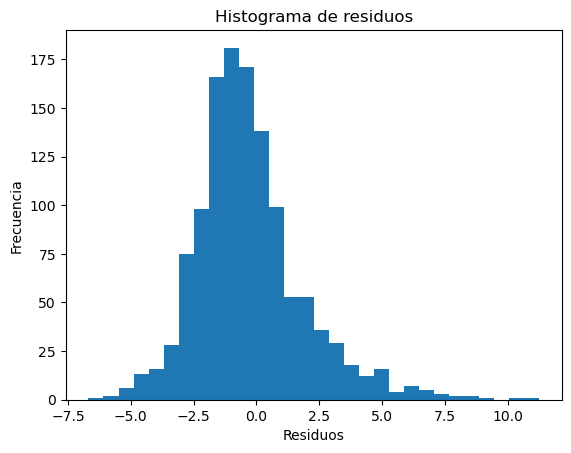

In [29]:
plt.hist(residuos, bins=30)
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de residuos')
plt.show()

4. Gráfico de Q-Q (cuantil-cuantil):

Este gráfico compara los cuantiles de los residuos con los cuantiles esperados de una distribución normal. Puede ayudarte a evaluar si los residuos siguen una distribución normal.

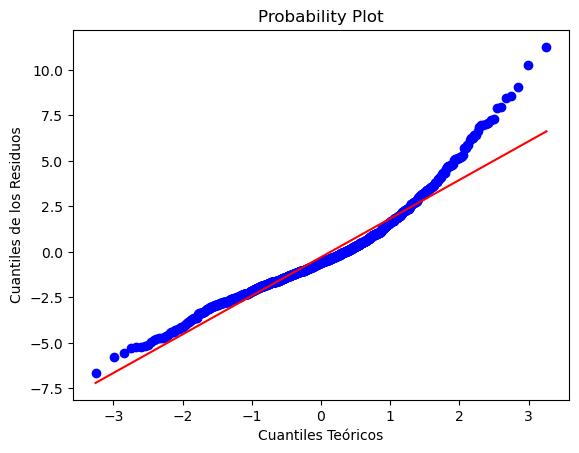

In [36]:
import scipy.stats as stats

stats.probplot(residuos, dist="norm", plot=plt)
plt.xlabel('Cuantiles Teóricos')
plt.ylabel('Cuantiles de los Residuos')
plt.show()


5. Gráfico de influencia:

Un gráfico de influencia muestra la influencia de cada observación en el ajuste del modelo. Puede ayudarte a identificar puntos atípicos o valores influyentes que pueden tener un impacto significativo en los resultados de la regresión.

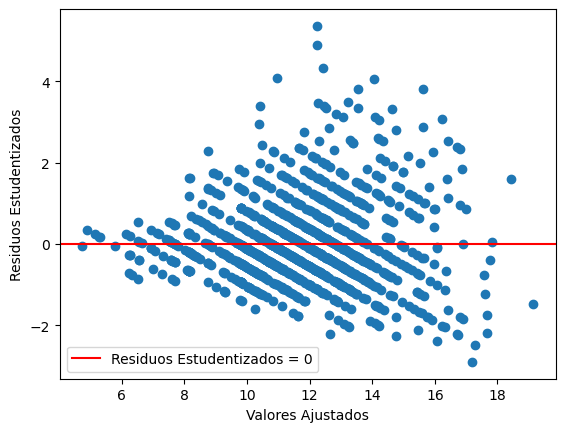

In [39]:
import statsmodels.api as sm

infl = sm.OLS(y, sm.add_constant(pred)).fit().get_influence()
residuos_estudentizados = infl.resid_studentized_external

plt.scatter(pred, residuos_estudentizados)
plt.axhline(y=0, color='r', linestyle='-', label='Residuos Estudentizados = 0')
plt.xlabel('Valores Ajustados')
plt.ylabel('Residuos Estudentizados')
plt.legend()
plt.show()